<a href="https://colab.research.google.com/github/man-is-h/uci_ml_models/blob/master/Wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

--2020-07-23 19:18:17--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.07s   

2020-07-23 19:18:17 (1.20 MB/s) - ‘winequality-red.csv’ saved [84199/84199]

--2020-07-23 19:18:20--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: ‘winequality-white.csv’

winequality-white.c 100%[=========

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
#read dataset
white_dataset = pd.read_csv("winequality-white.csv", sep = ';')
white_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
corr = white_dataset.corr()
corr = corr.abs()
corr = corr.style.background_gradient(cmap= 'coolwarm')
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.022697,0.289181,0.089021,0.023086,0.049396,0.091070,0.265331,0.425858,0.017143,0.120881,0.113663
volatile acidity,0.022697,1.000000,0.149472,0.064286,0.070512,0.097012,0.089261,0.027114,0.031915,0.035728,0.067718,0.194723
citric acid,0.289181,0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,0.163748,0.062331,0.075729,0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,0.194133,0.026664,0.450631,0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,0.090439,0.016763,0.360189,0.209934
free sulfur dioxide,0.049396,0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,0.000618,0.059217,0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,0.448892,0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,0.093591,0.074493,0.780138,0.307123
pH,0.425858,0.031915,0.163748,0.194133,0.090439,0.000618,0.002321,0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,0.017143,0.035728,0.062331,0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,0.017433,0.053678


In [ ]:
white_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
#no object type data
X = white_dataset
Y = white_dataset[['quality']]
X = X.drop(columns = ['quality','citric acid', 'free sulfur dioxide'])
X.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,20.7,0.045,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,1.6,0.049,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,6.9,0.050,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,8.5,0.058,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,8.5,0.058,186.0,0.9956,3.19,0.40,9.9


In [ ]:
Y.head()

,quality
0,6
1,6
2,6
3,6
4,6


In [ ]:
#convert dataframe to numpy array
X = np.array(X)
Y = np.array(Y)

(array([  20.,  163.,    0., 1457.,    0., 2198.,  880.,    0.,  175.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <a list of 10 Patch objects>)

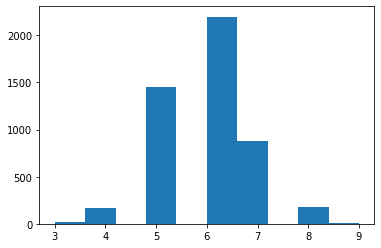

In [ ]:
plt.hist(Y)

In [ ]:
#normalize data with mean and std deviation

mean = np.mean(X, axis = 0)
std = np.std(X, axis =0)
X = (X - mean) /(std)

In [ ]:
#train test split
def train_test_split(X, Y, ratio = 0.9):
  msk = np.random.rand(len(X)) <= ratio
  X_train = X[msk]
  Y_train = Y[msk]
  X_test = X[~msk]
  Y_test = Y[~msk]

  return X_train, Y_train, X_test, Y_test 

In [ ]:
X_train, Y_train, X_test, Y_test = train_test_split(X,Y)

In [ ]:
X_train.shape

(4404, 9)

In [ ]:
Y_train.shape

(4404, 1)

In [ ]:
class linear_regressor():

  def __init__(self, input_size, epochs = 20, learning_rate = 0.1, batch_size = 32):
    self.lr = learning_rate
    self.epochs = epochs
    self.batch_size = batch_size
    self.input_size = input_size

    self.weights = np.random.rand(self.input_size , 1)
    self.bias = 0.0

  #forwardprop

  def forward(self, x, y):
    outputs =  (np.dot(x, self.weights) + self.bias)
    self.error = outputs - y
    return outputs
  
  #mse
  def mse(self):
    return np.mean(np.square(self.error))

  #compute_gradient
  def compute_grad(self, x):
    self.dW = (np.dot(np.transpose(x), self.error)/ x.shape[0]).reshape(-1,1)
    self.db = np.mean(self.error)


  #gradient descent
  def update(self):
    self.weights = self.weights - (self.lr)*self.dW
    self.bias = self.bias - (self.lr)*self.db

  #shuffle
  def shuffle(self, X, Y):
    length = Y.shape[0]
    indices = np.arange(length)
    np.random.shuffle(indices)
    x = X[indices]
    y = Y[indices]
    return x, y

  #train
  def train(self, x, y):
    for ep in range(self.epochs):
      x, y = self.shuffle(x, y)
      losses = []
      for s_i in range(0 , len(y), self.batch_size):
        e_i = min(s_i + self.batch_size, len(y))
        x_batch = x[s_i:e_i]
        y_batch = y[s_i:e_i]

        pred = self.forward(x_batch, y_batch)
        losses.append(self.mse())
        self.compute_grad(x_batch)
        self.update()
      print("Epoch : ", ep)
      print("Error : ", np.mean(losses))


  #test
  def test(self, x, y, tau):
    #tau = tolerance in error
    losses = []
    correct = 0
    for s_i in range(0, len(y), self.batch_size):
      e_i = min(len(y), s_i + self.batch_size)
      x_batch = x[s_i:e_i]
      y_batch = y[s_i:e_i]

      pred = self.forward(x_batch, y_batch)
      losses.append(self.mse())
      for er in self.error:
        if abs(er) <= tau:
          correct += 1
    print("Error : ", np.mean(losses))
    print("Accuracy :", round(correct/len(y), 3))



In [ ]:
model = linear_regressor(X_train.shape[1], epochs = 20, batch_size = 256, learning_rate=0.1)

In [ ]:
model.train(X_train, Y_train)

Epoch :  0
Error :  10.875671205536728
Epoch :  1
Error :  0.8103330549723722
Epoch :  2
Error :  0.5629349510442843
Epoch :  3
Error :  0.5597424175934183
Epoch :  4
Error :  0.5669707293862116
Epoch :  5
Error :  0.5631272565831722
Epoch :  6
Error :  0.5742859713988313
Epoch :  7
Error :  0.5672845314485216
Epoch :  8
Error :  0.5656337551657443
Epoch :  9
Error :  0.5576141856003658
Epoch :  10
Error :  0.5520349663262943
Epoch :  11
Error :  0.5561657012272734
Epoch :  12
Error :  0.5620913151001841
Epoch :  13
Error :  0.5693033709517555
Epoch :  14
Error :  0.5633574932847414
Epoch :  15
Error :  0.5667929886979254
Epoch :  16
Error :  0.5705031465358706
Epoch :  17
Error :  0.5631460968416663
Epoch :  18
Error :  0.5622930271402431
Epoch :  19
Error :  0.5613367801345684


In [ ]:
model.test(X_test, Y_test, 1)

Error :  0.6065792450879943
Accuracy : 0.826


In [ ]:
model.test(X_train, Y_train, 1)

Error :  0.5495116052797232
Accuracy : 0.846
